<h1> <center>Exercice de Machine Learning sur le jeu de donnée Titanic en utilisant l'algorithme Logistic Regression qui est un algorithme de classification  d'apprentissage supervisé</center></h1>

<img src='titanic.jpeg' >

### Dans ce notebook, nous utiliserons les données issu du naufrage du Titanic pour essayer de prédire à partir de nouvelles données de nouvelles personnes si elles auraient survécu si elles étaient pendant ce naufrage.

Notre but ici étant de classifier si des personnes auraient survécu ou pas, alors notre algorithme de classification **Logistic Regression** va nous permettre de trouver la meilleure ligne ou courbe permettant de séparé nos données en deux grands groupes à savoir : les données de ceux qui ont survécu et ceux de ceux qui n'ont pas survécu

In [68]:
#Importations nécessaires
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
sns.set_theme(style="darkgrid")

In [63]:
df = pd.read_csv('titanic.csv')
df.head()

,Survived,Pclass,Sex,Age,Siblings/Spouses,Parents/Children,Fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500


In [3]:
#Le nombre de lignes et colonne de notre dataframe
df.shape

(887, 7)

On a donc 887 lignes dans notre dataframe et 7 colonnes

In [6]:
#Informations sur les colonnes de notre dataframe et le nombre de ligne correctes (ne contenant pas de valeur nulle) de notre df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887 entries, 0 to 886
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Survived          887 non-null    int64  
 1   Pclass            887 non-null    int64  
 2   Sex               887 non-null    object 
 3   Age               887 non-null    float64
 4   Siblings/Spouses  887 non-null    int64  
 5   Parents/Children  887 non-null    int64  
 6   Fare              887 non-null    float64
dtypes: float64(2), int64(4), object(1)
memory usage: 48.6+ KB


On constate que nous avons bien toutes les lignes bien renseignées pour chacune de nos colonnes et que toutes nos colonnes contiennent des nombres sauf la colonne sex car elle contient soit male ou female

In [10]:
df['Sex'].value_counts()

male      573
female    314
Name: Sex, dtype: int64

On a donc dans notre dataframe **573** individu de sex **male** et **314** de sex **female**

In [15]:
#Faisons de même pour toutes les autres colonnes
for i in df.columns:
    print(f"\n========{i}=========")
    print(df[i].value_counts())


========Survived=========
0    545
1    342
Name: Survived, dtype: int64

========Pclass=========
3    487
1    216
2    184
Name: Pclass, dtype: int64

========Sex=========
male      573
female    314
Name: Sex, dtype: int64

========Age=========
22.00    39
28.00    37
18.00    36
21.00    34
24.00    34
         ..
70.50     1
36.50     1
23.50     1
55.50     1
0.42      1
Name: Age, Length: 89, dtype: int64

========Siblings/Spouses=========
0    604
1    209
2     28
4     18
3     16
8      7
5      5
Name: Siblings/Spouses, dtype: int64

========Parents/Children=========
0    674
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parents/Children, dtype: int64

========Fare=========
8.0500     43
13.0000    42
7.8958     36
7.7500     33
26.0000    31
           ..
8.4583      1
9.8375      1
8.3625      1
14.1083     1
17.4000     1
Name: Fare, Length: 248, dtype: int64


**Signification des informations de nos colonnes pour une bonne compréhension de nos données**

- **Survived** : Renseigne si l'individu a survécu ou pas. **1** si la personne a survécu ou **0** si non
- **Pclass** : Renseigne sur la classe sociale de la personne. **1** la personne est très riche, **2** elle est dans la moyenne et **3** elle est pauvre en quelque sorte
- **Age** : Age du passager
- **Siblings/Spouses** : Nombre d’époux, de frères ou de soeurs présents à bord du passager
- **Parents/Children** : 	Nombre de parents ou d’enfants présents à bord
- **Fare** : Prix du ticket du passager

**Pourcentage de ceux qui ont survécu vs ceux qui n'ont pas survécu**

<AxesSubplot:xlabel='Survived', ylabel='count'>

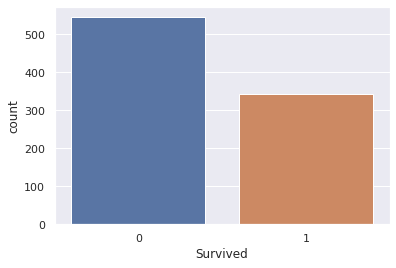

In [18]:
sns.countplot(x='Survived', data=df)

On voit que pendant le naufrage, il eut plus de mort que de survivant

**Pourcentage de la survie des personnes en fonction de leur classe**

<AxesSubplot:xlabel='Survived', ylabel='count'>

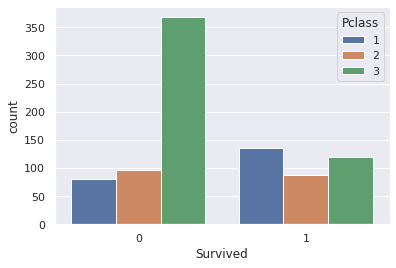

In [19]:
#Visualisation des survivants ou non en fonction de leur classe social
sns.countplot(x='Survived', hue='Pclass', data=df)

On constate que plusieurs de ceux qui n'ont pas survécu sont de la classe **3**, donc la survie d'un passager dépend en grande partie de sa classe sociale

<AxesSubplot:xlabel='Survived', ylabel='count'>

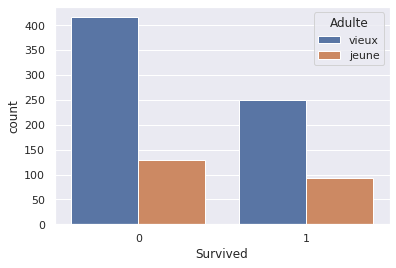

In [57]:
#Visualisation des survivants ou non en fonction de leur age
#Claasons les passager suivant le fait qu'ils soient adulte ou enfant
df['Adulte'] = df.Age
df['Adulte'].mask(df['Age']<=20,'jeune', inplace=True)
df['Adulte'].mask(df['Age']>20, 'vieux', inplace=True)
sns.countplot(x='Survived', hue='Adulte', data=df)

On constate que les passagers qui ont survécu sont plus des personnes agées. Lors de la sauvetage, les jeunes ont été plus priorisés

<AxesSubplot:xlabel='Survived', ylabel='count'>

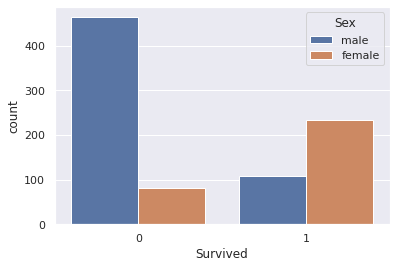

In [40]:
#Visualisation des survivants ou non en fonction de leur sex
sns.countplot(x='Survived', hue='Sex', data=df)

Comme nous pouvons le voir, plus d'hommes sont morts que de femmes, les femmes ont donc été priorisées comme les jeunes et les enfants pendant la sauvetage

count    887.00000
mean      32.30542
std       49.78204
min        0.00000
25%        7.92500
50%       14.45420
75%       31.13750
max      512.32920
Name: Fare, dtype: float64


<AxesSubplot:xlabel='Survived', ylabel='count'>

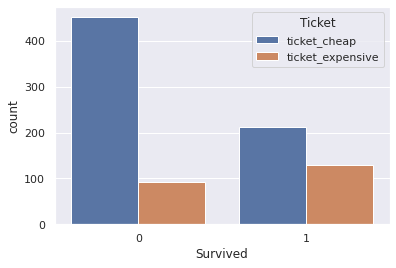

In [52]:
#Visualisation des survivants ou non en fonction de leur prix du ticket
print(df.Fare.describe())
df['Ticket'] = df.Fare
df['Ticket'].mask(df['Fare']<=df['Fare'].quantile(0.75),'ticket_cheap', inplace=True)
df['Ticket'].mask(df['Fare']>df['Fare'].quantile(0.75),'ticket_expensive', inplace=True)
sns.countplot(x='Survived', hue='Ticket', data=df)

Nous constatons que le prix du ticket agit également sur la survie des passagers

In [53]:
#Visualisation des survivants ou non en fonction de nombre de personnes de la famille
df['family'] = df['Siblings/Spouses']+df['Parents/Children']
df

,Survived,Pclass,Sex,Age,Siblings/Spouses,Parents/Children,Fare,Adulte,Ticket,family
0,0,3,male,22.0,1,0,7.2500,vieux,ticket_cheap,1
1,1,1,female,38.0,1,0,71.2833,vieux,ticket_expensive,1
2,1,3,female,26.0,0,0,7.9250,vieux,ticket_cheap,0
3,1,1,female,35.0,1,0,53.1000,vieux,ticket_expensive,1
4,0,3,male,35.0,0,0,8.0500,vieux,ticket_cheap,0
...,...,...,...,...,...,...,...,...,...,...
882,0,2,male,27.0,0,0,13.0000,vieux,ticket_cheap,0
883,1,1,female,19.0,0,0,30.0000,jeune,ticket_cheap,0
884,0,3,female,7.0,1,2,23.4500,jeune,ticket_cheap,3
885,1,1,male,26.0,0,0,30.0000,vieux,ticket_cheap,0


<AxesSubplot:xlabel='Survived', ylabel='count'>

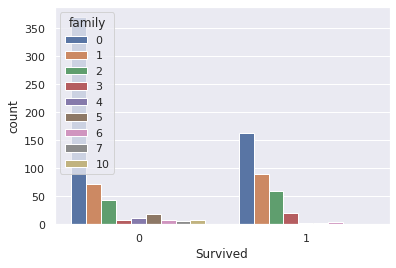

In [54]:
sns.countplot(x='Survived', hue='family', data=df)

In [55]:
#Essayons d'afficher les relations entre nos features
df.corr()

,Survived,Pclass,Age,Siblings/Spouses,Parents/Children,Fare,family
Survived,1.000000,-0.336528,-0.059665,-0.037082,0.080097,0.256179,0.014673
Pclass,-0.336528,1.000000,-0.391492,0.085026,0.020252,-0.548919,0.068244
Age,-0.059665,-0.391492,1.000000,-0.297669,-0.193741,0.112329,-0.300297
Siblings/Spouses,-0.037082,0.085026,-0.297669,1.000000,0.414244,0.158839,0.890595
Parents/Children,0.080097,0.020252,-0.193741,0.414244,1.000000,0.215470,0.782864
Fare,0.256179,-0.548919,0.112329,0.158839,0.215470,1.000000,0.216250
family,0.014673,0.068244,-0.300297,0.890595,0.782864,0.216250,1.000000


In [64]:
#Transformons notre colonne sex en nombre
df['male'] = df.Sex
df.male.mask(df['Sex']=='male',1, inplace=True)
df.male.mask(df['Sex']=='female',0, inplace=True)
df

,Survived,Pclass,Sex,Age,Siblings/Spouses,Parents/Children,Fare,male
0,0,3,male,22.0,1,0,7.2500,1
1,1,1,female,38.0,1,0,71.2833,0
2,1,3,female,26.0,0,0,7.9250,0
3,1,1,female,35.0,1,0,53.1000,0
4,0,3,male,35.0,0,0,8.0500,1
...,...,...,...,...,...,...,...,...
882,0,2,male,27.0,0,0,13.0000,1
883,1,1,female,19.0,0,0,30.0000,0
884,0,3,female,7.0,1,2,23.4500,0
885,1,1,male,26.0,0,0,30.0000,1


## Préparation des données

In [65]:
X = df[['Pclass', 'male', 'Age', 'Siblings/Spouses', 'Parents/Children', 'Fare']].values
y = df['Survived'].values

print(X)
print(y)

[[3 1 22.0 1 0 7.25]
 [1 0 38.0 1 0 71.2833]
 [3 0 26.0 0 0 7.925]
 ...
 [3 0 7.0 1 2 23.45]
 [1 1 26.0 0 0 30.0]
 [3 1 32.0 0 0 7.75]]
[0 1 1 1 0 0 0 0 1 1 1 1 0 0 0 1 0 1 0 1 0 1 1 1 0 1 0 0 1 0 0 1 1 0 0 0 1
 0 0 1 0 0 1 1 0 0 1 0 0 0 0 1 1 0 1 1 0 1 0 0 1 0 0 0 1 1 0 1 0 0 0 0 0 1
 0 0 0 1 1 0 1 1 0 1 1 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 1 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 1 0 0 0 0 1 0 0 1 0 0 0 0 1 1 0 0 0 1 0 0
 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0
 1 1 0 0 1 0 1 1 1 1 0 0 1 0 0 0 0 0 1 0 0 1 1 1 0 1 0 0 0 1 1 0 1 0 1 0 0
 0 1 0 1 0 0 0 1 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 1 1 1 1 1
 1 0 0 0 0 0 1 1 1 0 1 1 0 1 1 0 0 0 1 0 0 0 1 0 0 1 0 1 1 1 1 0 0 0 0 0 0
 1 1 1 1 0 1 0 1 1 1 0 1 1 1 0 0 0 1 1 0 1 1 0 0 1 1 0 1 0 1 1 1 1 0 0 0 1
 0 0 1 1 0 1 1 0 0 0 1 1 1 1 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 1 1 1 1 1 0
 0 0 0 1 1 0 0 0 1 1 0 1 0 0 0 1 0 1 1 1 0 1 1 0 0 0 0 1 1 0 0 0 0 0 0 1 0
 0 0 0 1 0 1 0 1 1 0 0 0 0 0 0 0 1 1 0 

In [69]:
X_train,  X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.3, random_state=45, stratify=y)

## Entrainement et test du modele

In [70]:
model = LogisticRegression()
model.fit(X_train,  Y_train)

LogisticRegression()

In [72]:
#Les cofficient trouvé par notre modèle pour chacune de nos colonnes
print(model.coef_, model.intercept_)

[[-1.01142356 -2.56696789 -0.04071376 -0.41334686 -0.14043392  0.00433122]] [4.65915762]


In [74]:
model.score(X_train, Y_train)

0.8096774193548387

Notre modele a donc une précision de 80% sur les données d'entrainement, essayons de voir sa précision au niveau de nos données de test

In [75]:
model.score(X_test, Y_test)

0.797752808988764

Le medele a une précision de **79.77%** sur nos données de test

# Fin du notebook